# PyTorch Workflow

Let's explore an example PyTorch end-to-end workflow.

Resources:
* Ground truth notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
* Book version of notebook - https://www.learnpytorch.io/01_pytorch_workflow/
* Ask a question - https://github.com/mrdbourke/pytorch-deep-learning/discussions




In [ ]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluate a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluate a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [ ]:
import torch
from torch import nn  # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.1.0+cu118'

## 1. Data (Preparing and Loading)

Data can be almost anything.. in machine learning.
* Excel spreadsheet
* Images of any kind
* Videos (Youtube has lots of data...)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in the numerical representation.

To showcase this, let's create some **known**  data using a linear regression formula.

We'll use a linear regression formula to make a straight line with know **parameters**.

In [ ]:
# Create **known** parameters

weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Splitting data into training and test stets (one of the most important concepts in machine learning in general)

Let's creat a trainign and test set with our data.

In [ ]:
# Creat a train/test split
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, visualize, visualize!"

In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data, and compares predictions
  """
  plt.figure(figsize=(10,7))

  # Plot training data  in blue
  plt.scatter(train_data, train_labels, c='b', s=4, label='Training data ')

  # Plot test data in green
  plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')

  # Are there predictions
  if predictions is not None:
    # plot the predictions
    plt.scatter(y_test, predictions, c='r', s=4, label ='Predictions')

  # Show the legend
  plt.legend(prop={"size":14});

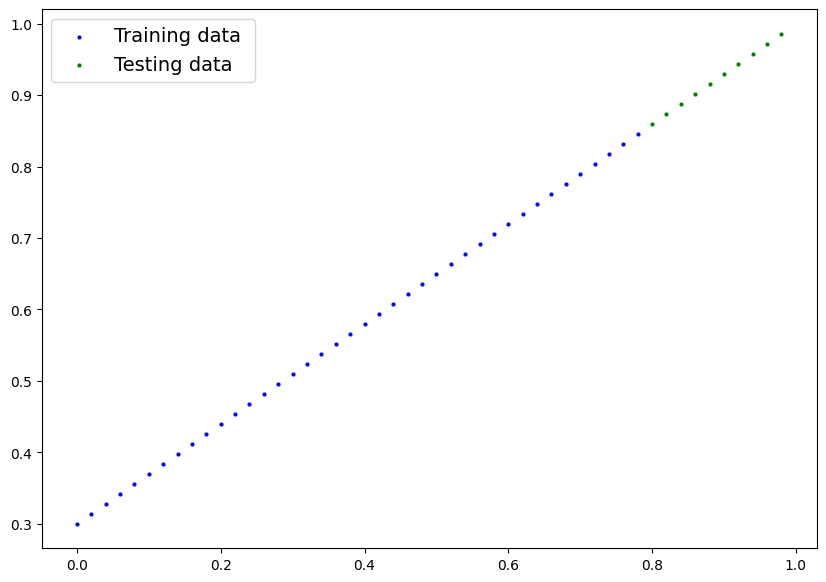

In [ ]:
plot_predictions()

## 2. Build model

Our first PyTorch model!

This is very exciting... let's do it!

Because we are going to be building throughout the course, I 'd recommentd getting familiar with Classes. The following resource from Real Python : https://realpython.com/python3-object-oriented-programming/

What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to creat our data)

How to do so?

Through two main algorithms:
1. Gradient Descent - https://www.youtube.com/watch?v=IHZwWFHWa-w&feature=youtu.be
2. Backpropagation - https://www.youtube.com/watch?v=Ilg3gGewQ5U


In [ ]:
from torch import nn

# Create a linear regression model class

class LinearRegressionModel(nn.Module): # <- Almost everything in PyTorch module inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))

    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad = True,
                                         dtype = torch.float))

  # Forward method to define the compiutation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x + self.bias # this is the linear regression formula


### PyTorch model building essentials

* `torch.nn` - Contains all of the buildings for computational graphs (a neural network can be considered a computational graph)
* `torch.nn.Parameter` - What parameters should our model try and learn, often a PyTorch layer from `troch.nn` will set these for us
* `torch.nn.Module` - The base class for all neural network mnodles, if you subclass it, you should overwrite `forward()`
* `torch.optim` - This where the optimizers in PyTorch live, they will help with gradient descent.
* `def forward()` - All `nn.Module` subclasses require you to overwrite `forward()`, this method defines what happens in the forward computation.

### Checking the contents of our PyTorch model

Now we've created a model, let's see what's inside...

So we can check our model parameters or what's inside our model using `.parameters()`.

In [ ]:
# Create a random seed

random_seed = 42
torch.manual_seed(random_seed)

# Create an instanse of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List names parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `torch.inference_mode()`

To check out model's predictive power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through our model, it's going to run it through the `forward()` method.

In [ ]:
# Make predictions with model

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

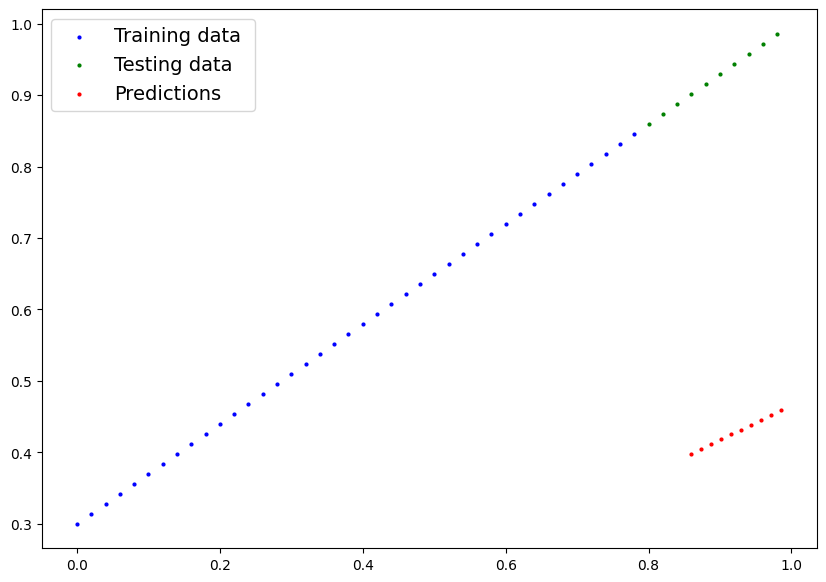

In [ ]:
plot_predictions(predictions=y_preds)

### 3. Train model

The whole idea of training is for aa model to move from some **unknown** parameters (these may be random) to some **known** parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your model predictions are is to use the loss function.


* Loss function may also be called cost fucntion or criterion in different areas. For our case, we're going to refer to tit as a loss function.

Things we need to train:

* **Loss Function:** A function to measure how wrong your model's predictions are to the ideal ouputs, lower is better.
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias in opur case) to improve the loss function.

 * Inside the optimizer you'll often have to set two parameters:
   * `params` - the model parameters you'd like to optimize, for example `params=model_0.parameters()`
   * `lr` (learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small `lr` results in small changes, a large `lr` results in large changes)

And specifically for PyTorch we need:

* A training loop
* A testing loop

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# Check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.01) # lr = learning rate = possibly the most important hyperparameter you can set

**Q:** Which loss function and optimizer should I use?
**A:** This will be a problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular problem set.

For example, for a regression problem (like ours), a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice.

But for a classification problem like classifying whether a photo is of a dog or cat, you'll likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loss).

### Building a trining loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:

0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions from data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backward through the network to calculate the fradients of each of the parameters of our model with repsect to the loss. (**backpropagation**)
5. Optimizer step - use the optimizer to adjuyst our model's parameters to try and improve the loss (**gradient descent**)

In [ ]:
# An epoch is one loop through the data... (this is a hyperparameter because we've set it ourselves)

epochs = 200

# track different values
epoch_count = []
loss_values = []
test_loss_values = []

# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

  # 1. Forward Pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  #4.Perform backpropagation on the loss with repsect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizers changes will acculate through the loop so... we have to zero them above in step 3 for the next iteration of the loop

  ### Testing
  model_0.eval() # turns off different settings in the model not needed for evaluation/testing (droupout batch norm layers)
  with torch.inference_mode(): # turns off gradient tracking & couple more things behind the scenes.
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happenin
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    # Print out model state_dict()
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

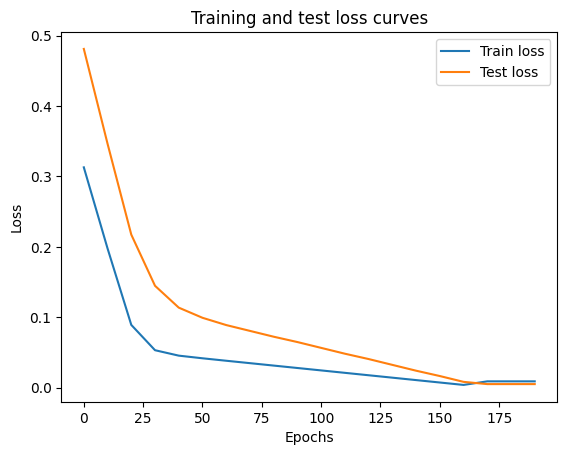

In [ ]:
# Plot the loss curve
import numpy as np

plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = 'Train loss')
plt.plot(epoch_count, test_loss_values, label = 'Test loss')
plt.title('Training and test loss curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

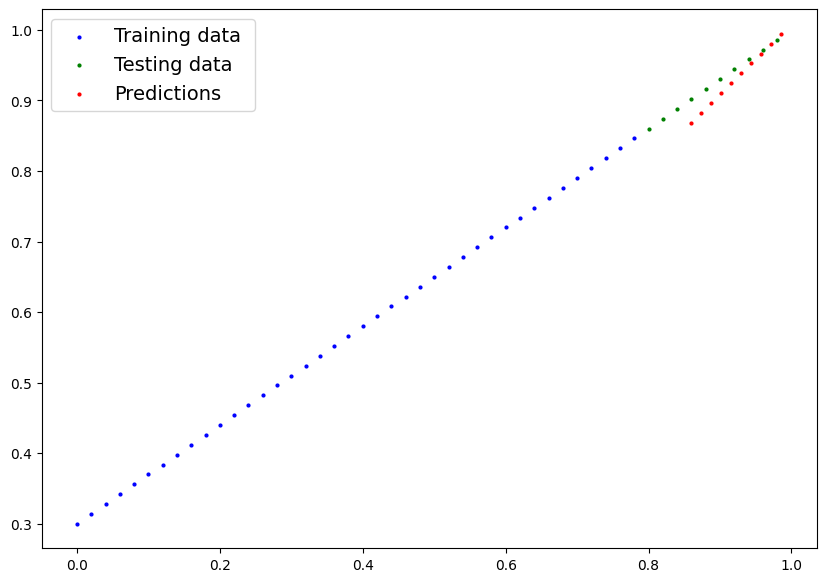

In [ ]:
plot_predictions(predictions = y_preds_new)

## Saving a model in PyTorch

There are three main methods you should know about for savingand loading models in PyTorch.

1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format
2. `torch.load()` - allows to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows you to load a model's saved state dictionary

In [ ]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create a model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok=True)

# Create model path
MODEL_NAME = '01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(),
           f = MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [ ]:
!ls -m models

01_pytorch_workflow_model_0.pth


## Loading a PyTorch model

Since we saved our model's `state_dict()` we'll create a new instance of our modl class and load our model, we'll create a new instanve of our model class and load the saved `state_dict()` into this.

In [ ]:
# To load in a saved state_dict we have to insatntiate a new instanve of our model class

loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))


<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# Compare laoded model preds with original model preds

y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let's go back through the staeps above and see it all in one place.

In [ ]:
# Import PyTorch and matplolib

import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.1.0+cu118'

Create device agnostic code

This means if we've got access to a GPU, our code will use it (for potentially faster computing). If no GPU is avalibale, the code will default to use CPU.

In [ ]:
# Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

Using device: cpu


### 6.1 Data

In [ ]:
# Create some data using the linear regression formula of y = weight * X + bias

weight = 0.7
bias = 0.3

# Create a range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias

In [ ]:
# Split the data

train_split = int(0.8* len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_test)

(40, 10)

In [ ]:
# Plot the data
# Note: if you dont't have the plor_predictions() function loaded, this will error
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data, and compares predictions
  """
  plt.figure(figsize=(10,7))

  # Plot training data  in blue
  plt.scatter(train_data, train_labels, c='b', s=4, label='Training data ')

  # Plot test data in green
  plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')

  # Are there predictions
  if predictions is not None:
    # plot the predictions
    plt.scatter(y_test, predictions, c='r', s=4, label ='Predictions')

  # Show the legend
  plt.legend(prop={"size":14});



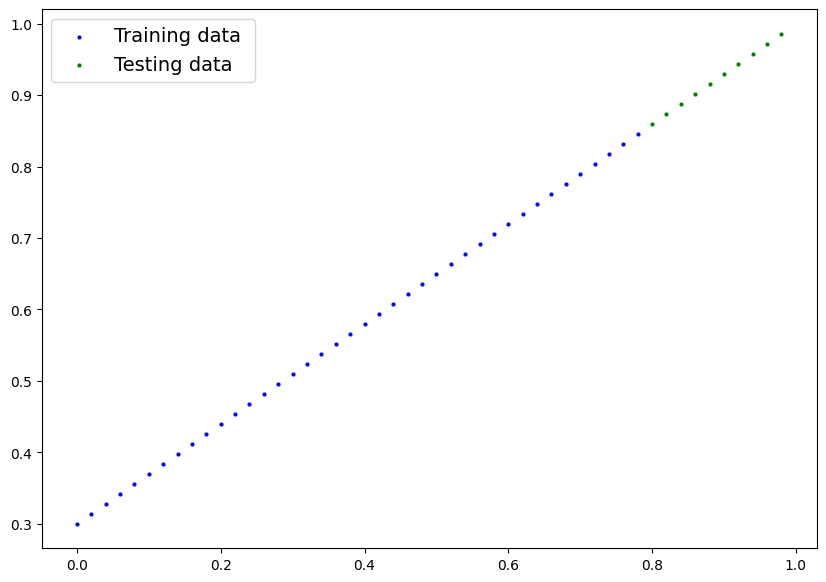

In [ ]:
plot_predictions(X_train, y_train, X_test, y_test)

### 6.2 Building a PyTorch Linear model

In [ ]:
# Create a linear model by sublassing nn.Module

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)

model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
# Set the model to use the target device
model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

### 6.3 Trainning

For training we need :

* Loss function
* Optimizer
* Training loop
* Testing loop

In [ ]:
# Setup Loss function
loss_fn = nn.L1Loss() # Same as MAE

# Setup our Optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr=0.01)

In [ ]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 600

# Put data on the target device:
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epochs in range(epochs):
  model_1.train()

  #1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss:
  loss = loss_fn(y_pred, y_train)

  #3. Optimizer zero grad:
  optimizer.zero_grad()

  #4. Perform Back prop
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  # Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  # Print out what is happening

  if epochs % 10 ==0:
    print(f"Epoch: {epochs}, | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0, | Loss: 0.009032594040036201 | Test Loss: 0.005505365319550037
Epoch: 10, | Loss: 0.009032594040036201 | Test Loss: 0.005505365319550037
Epoch: 20, | Loss: 0.009032594040036201 | Test Loss: 0.005505365319550037
Epoch: 30, | Loss: 0.009032594040036201 | Test Loss: 0.005505365319550037
Epoch: 40, | Loss: 0.009032594040036201 | Test Loss: 0.005505365319550037
Epoch: 50, | Loss: 0.009032594040036201 | Test Loss: 0.005505365319550037
Epoch: 60, | Loss: 0.009032594040036201 | Test Loss: 0.005505365319550037
Epoch: 70, | Loss: 0.009032594040036201 | Test Loss: 0.005505365319550037
Epoch: 80, | Loss: 0.009032594040036201 | Test Loss: 0.005505365319550037
Epoch: 90, | Loss: 0.009032594040036201 | Test Loss: 0.005505365319550037
Epoch: 100, | Loss: 0.009032594040036201 | Test Loss: 0.005505365319550037
Epoch: 110, | Loss: 0.009032594040036201 | Test Loss: 0.005505365319550037
Epoch: 120, | Loss: 0.009032594040036201 | Test Loss: 0.005505365319550037
Epoch: 130, | Loss: 0.00903259404003

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6979]])),
             ('linear_layer.bias', tensor([0.3099]))])

### 6.4 Making and evaluating predictions

In [ ]:
# Turn model into evaluation mode

model_1.eval()

# Make predictions on the test data:
with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds


tensor([[0.8682],
        [0.8821],
        [0.8961],
        [0.9100],
        [0.9240],
        [0.9379],
        [0.9519],
        [0.9659],
        [0.9798],
        [0.9938]])

In [ ]:
y_preds.cpu()

tensor([[0.8682],
        [0.8821],
        [0.8961],
        [0.9100],
        [0.9240],
        [0.9379],
        [0.9519],
        [0.9659],
        [0.9798],
        [0.9938]])

<ipython-input-40-73c71ba63e77>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  plot_predictions(predictions=np.array(torch.tensor(y_preds).numpy()))


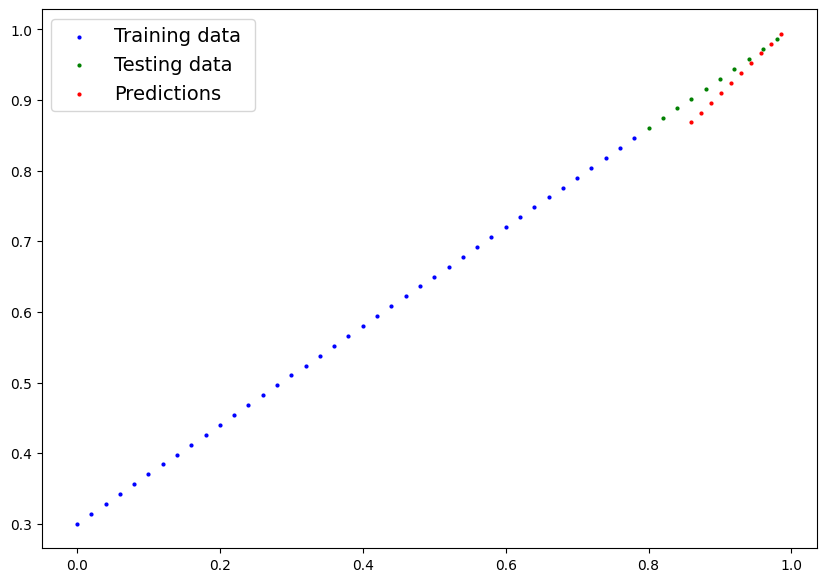

In [ ]:
# Check out our model predictions visually

plot_predictions(predictions=np.array(torch.tensor(y_preds).numpy()))

### 6.5 Saving and loading our model

In [ ]:
from pathlib import Path

# 1. Create a model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok=True)

# Create model path
MODEL_NAME = '01_pytorch_workflow_model_1.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_1.state_dict(),
           f = MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [ ]:
!ls -m models

01_pytorch_workflow_model_1.pth


In [ ]:
# To load in a saved state_dict we have to instantiate a new instanve of our model class
loaded_model_1 = LinearRegressionModelV2()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_1.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

# Put the loaded model to the device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
loaded_model_1.parameters()

<generator object Module.parameters at 0x7845fe589a80>

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6979]])),
             ('linear_layer.bias', tensor([0.3099]))])

In [ ]:
loaded_model_1.eval()
with torch.inference_mode():
  y_preds_loaded = loaded_model_1(X_test)
y_preds_loaded

tensor([[0.8682],
        [0.8821],
        [0.8961],
        [0.9100],
        [0.9240],
        [0.9379],
        [0.9519],
        [0.9659],
        [0.9798],
        [0.9938]])

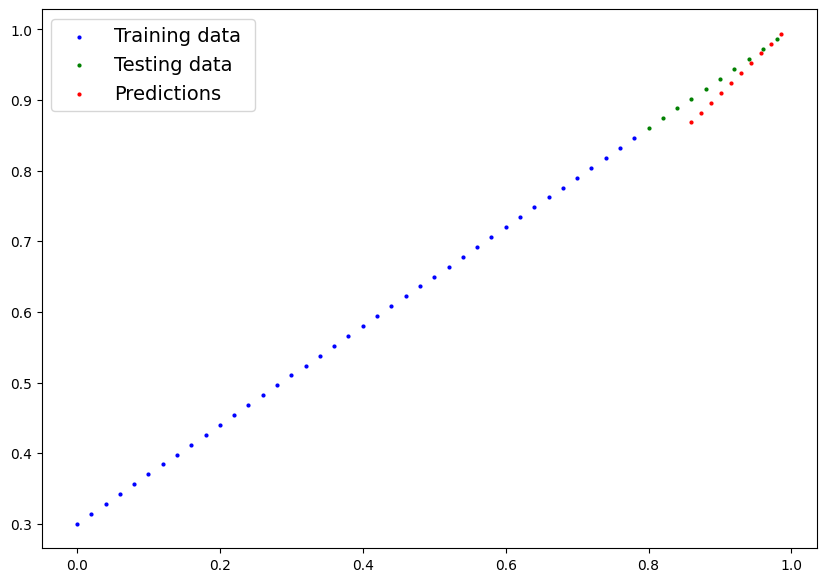

In [ ]:
plot_predictions(predictions=y_preds_loaded)

In [ ]:
y_preds == y_preds_loaded

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])